# Sentiment Analysis

Here we are conducting sentiment analysis on the luxurious **_La Badira Hotel_**, which is ranked as the #1 Best Value among 25 Tunisia Luxury Hotels on Tripadvisor website . We'll be analyzing the hotel's reviews using two distinct techniques:

1) VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

2) Roberta Pretrained Model from Hugging Face

**Furthermore, we will explore a comparison between these two techniques.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

plt.style.use('ggplot')

import nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## READ IN DATA

In [2]:
df= pd.read_excel(r"C:\Users\USER\Downloads\tripadvisor\Badira.xlsx")
print(df.shape)

(434, 3)


In [3]:
df.head()

,reviews,ratings,date
0,"Great stay at « la badira », the overall exper...",5,July 2023
1,Best hotel in Tunisia for couples: best breakf...,5,August 2023
2,A lovely hotel a little out of town but close ...,5,July 2023
3,I spent almost a week in la Badira hôtel and I...,5,July 2023
4,Have stayed at some pretty posh hotels like th...,5,June 2023


## Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [4]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [6]:
sia.polarity_scores('Iam unhappy!')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4753}

In [7]:
example = df['reviews'][50]
print(example)

We travelled to Hammamet Tunisia for our 20th wedding anniversary, looking for something novel to us, an adventure, but also one that allowed a relaxed pampered safe and beautiful experience at the same time. We found La Badira by accident but the website photos were so stunning — and we were pleased that it does not allow children, perfect for an anniversary trip — we decided to try it.   The rooms, grounds, food, atmosphere, and opportunities for excursions were outstanding. But it was the staff above all who made this experience perfect.   My wife and I agreed as we left the hotel for the airport yesterday, the hotel service was the best either of us have ever encountered. I’ve stayed at luxury resorts around the world over the years: Paris, Florence, New York, New Delhi, and…


In [8]:
sia.polarity_scores(example)

{'neg': 0.081, 'neu': 0.674, 'pos': 0.245, 'compound': 0.984}

In [9]:
# Run the polarity score on the entire dataset
res = {}
for i, review in tqdm(df['reviews'].items(), total=len(df)):
    polarity_score = sia.polarity_scores(review)
    res[i] = polarity_score


  0%|          | 0/434 [00:00<?, ?it/s]

In [10]:
res

{0: {'neg': 0.025, 'neu': 0.701, 'pos': 0.274, 'compound': 0.9799},
 1: {'neg': 0.032, 'neu': 0.652, 'pos': 0.316, 'compound': 0.9771},
 2: {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.9802},
 3: {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.9674},
 4: {'neg': 0.01, 'neu': 0.761, 'pos': 0.229, 'compound': 0.9978},
 5: {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9432},
 6: {'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'compound': 0.9914},
 7: {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.9464},
 8: {'neg': 0.048, 'neu': 0.658, 'pos': 0.294, 'compound': 0.9661},
 9: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.9283},
 10: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.98},
 11: {'neg': 0.025, 'neu': 0.664, 'pos': 0.311, 'compound': 0.9838},
 12: {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.9796},
 13: {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9544},
 14: {'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.9919},
 1

In [11]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.025,0.701,0.274,0.9799
1,0.032,0.652,0.316,0.9771
2,0.000,0.713,0.287,0.9802
3,0.000,0.743,0.257,0.9674
4,0.010,0.761,0.229,0.9978
...,...,...,...,...
429,0.000,0.573,0.427,0.9953
430,0.058,0.610,0.333,0.9403
431,0.000,0.553,0.447,0.9738
432,0.051,0.802,0.148,0.9477


In [12]:
vaders = pd.DataFrame(res).T
vaders.index.name = 'Id'  # Set the index name to 'Id'
vaders.reset_index(inplace=True)  # Reset the index to create a regular column 'Id'
vaders = vaders.merge(df, left_on='Id', right_index=True, how='left')


In [13]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,reviews,ratings,date
0,0,0.025,0.701,0.274,0.9799,"Great stay at « la badira », the overall exper...",5,July 2023
1,1,0.032,0.652,0.316,0.9771,Best hotel in Tunisia for couples: best breakf...,5,August 2023
2,2,0.000,0.713,0.287,0.9802,A lovely hotel a little out of town but close ...,5,July 2023
3,3,0.000,0.743,0.257,0.9674,I spent almost a week in la Badira hôtel and I...,5,July 2023
4,4,0.010,0.761,0.229,0.9978,Have stayed at some pretty posh hotels like th...,5,June 2023


## Plot VADER Results

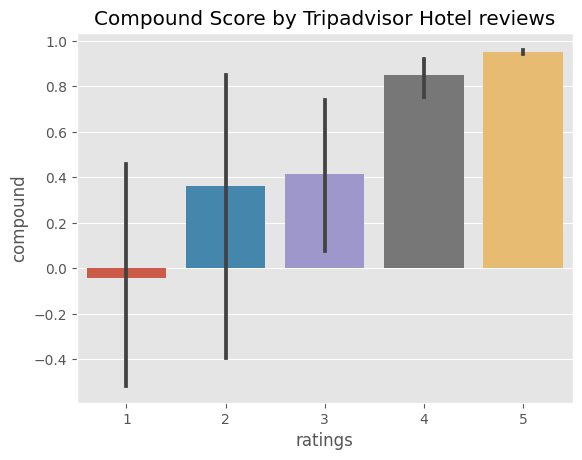

In [14]:
ax = sns.barplot(data=vaders, x='ratings', y='compound')
ax.set_title('Compound Score by Tripadvisor Hotel reviews')
plt.show()

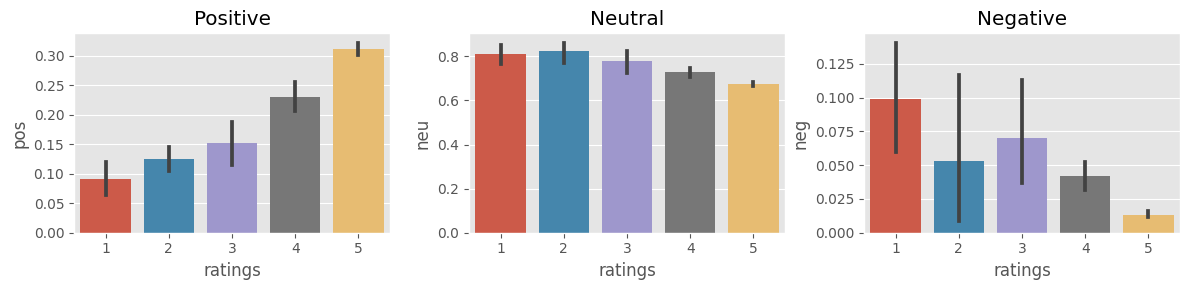

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='ratings', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ratings', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ratings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

     Use a model trained of a large corpus of data.
     Transformer model accounts for the words but also the context related to other words.

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [17]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [18]:
# VADER results on example
print(example)
sia.polarity_scores(example)

We travelled to Hammamet Tunisia for our 20th wedding anniversary, looking for something novel to us, an adventure, but also one that allowed a relaxed pampered safe and beautiful experience at the same time. We found La Badira by accident but the website photos were so stunning — and we were pleased that it does not allow children, perfect for an anniversary trip — we decided to try it.   The rooms, grounds, food, atmosphere, and opportunities for excursions were outstanding. But it was the staff above all who made this experience perfect.   My wife and I agreed as we left the hotel for the airport yesterday, the hotel service was the best either of us have ever encountered. I’ve stayed at luxury resorts around the world over the years: Paris, Florence, New York, New Delhi, and…


{'neg': 0.081, 'neu': 0.674, 'pos': 0.245, 'compound': 0.984}

In [19]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0019265204, 'roberta_neu': 0.01854325, 'roberta_pos': 0.9795303}


In [20]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [21]:
model.config.vocab_size

50265

In [22]:
res = {}
for i, review in tqdm(df['reviews'].items(), total=len(df)):
    try:
        vader_result = sia.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(review)
        both = {**vader_result_rename, **roberta_result}
        res[i] = both
    except RuntimeError:
        print(f'Broke for index {i}')


  0%|          | 0/434 [00:00<?, ?it/s]

In [23]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index(drop=True)  # Remove the 'index' column
df_combined = pd.concat([df, results_df], axis=1)


In [24]:
df_combined

,reviews,ratings,date,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,"Great stay at « la badira », the overall exper...",5,July 2023,0.025,0.701,0.274,0.9799,0.002544,0.012717,0.984739
1,Best hotel in Tunisia for couples: best breakf...,5,August 2023,0.032,0.652,0.316,0.9771,0.001521,0.013009,0.985470
2,A lovely hotel a little out of town but close ...,5,July 2023,0.000,0.713,0.287,0.9802,0.001724,0.014144,0.984131
3,I spent almost a week in la Badira hôtel and I...,5,July 2023,0.000,0.743,0.257,0.9674,0.001977,0.014769,0.983255
4,Have stayed at some pretty posh hotels like th...,5,June 2023,0.010,0.761,0.229,0.9978,0.003653,0.031859,0.964489
...,...,...,...,...,...,...,...,...,...,...
429,"It's amazing luxury hotel, recently opened, st...",5,May 2015,0.000,0.573,0.427,0.9953,0.001293,0.006787,0.991921
430,Good food (perfect meals and nice presentation...,4,May 2014,0.058,0.610,0.333,0.9403,0.005093,0.033196,0.961711
431,This hotel is exellent.. I spent two days the...,5,March 2015,0.000,0.553,0.447,0.9738,0.001483,0.013236,0.985281
432,La Badira Hotel is a new hotel in Hammamet Tun...,4,January 2015,0.051,0.802,0.148,0.9477,0.040847,0.162041,0.797112


## Comparing Scores between Models


In [25]:
df_combined.columns

Index(['reviews', 'ratings', 'date', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
      dtype='object')

## Combine and Compare

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


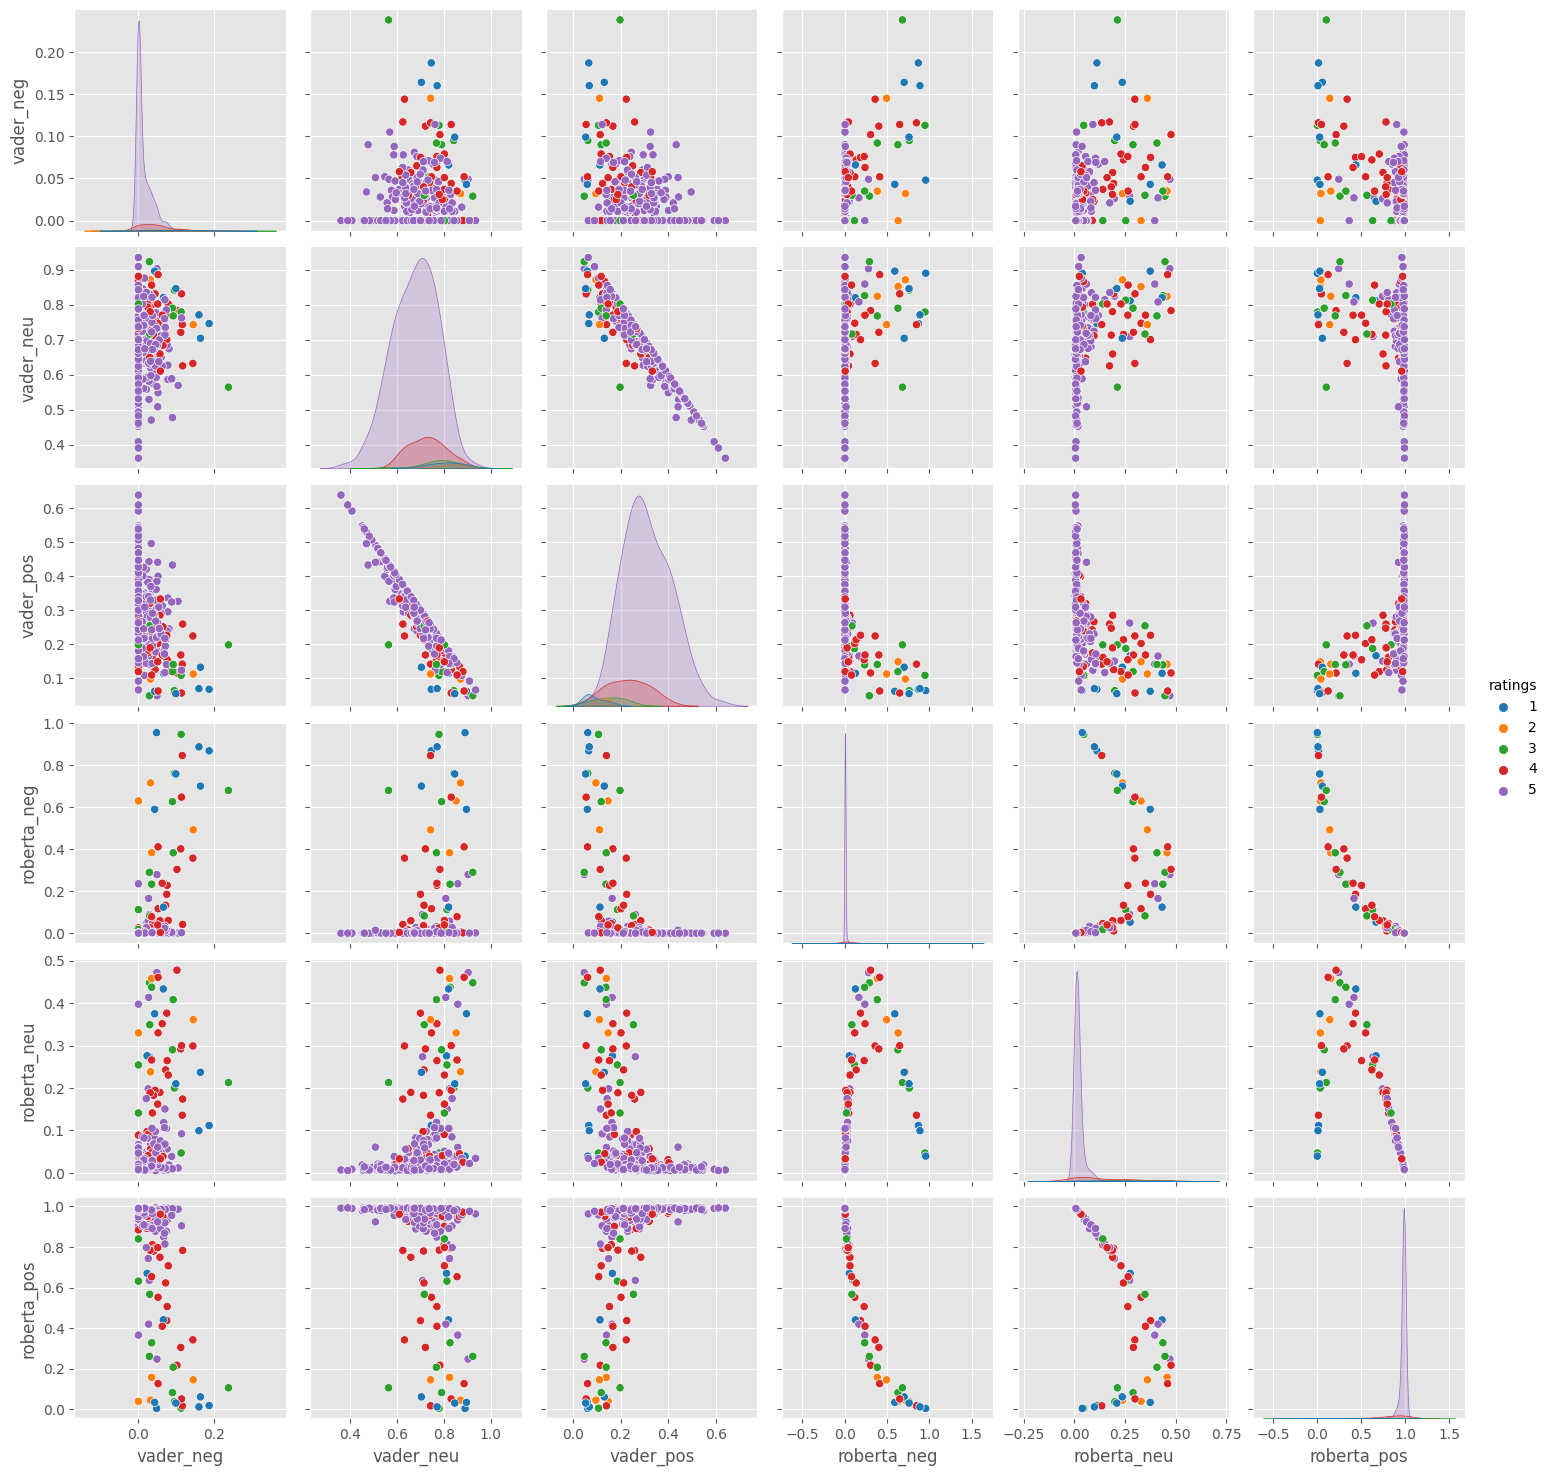

In [26]:
sns.pairplot(data=df_combined,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='ratings',  # Use the column from df_combined that represents ratings
             palette='tab10')
plt.show()


## Review Examples:

    Positive 1-Star and Negative 5-Star Reviews
    some examples where the model scoring and review score differ the most

 Positive 1-Star view

In [27]:
df_combined.query('ratings == 1') \
    .sort_values('roberta_pos', ascending=False)['reviews'].values[0]

'La Badira is a beautiful hotel and what makes it truly special are the people working there. So many kind , professional, hard working people who go above and beyond to make the hotel a superb place in which to relax and enjoy Hammamet. I would definitely have given it 4 stars in my review if it had not been for the following issue. As you know I went into the main pool on my first day wearing a wetsuit type swimsuit bought from a professional swim shop and was told that I was not allowed to be in the pool - I spoke to the guest relations manager and the following day to yourself. I had read the clothing requirements and it plainly said no t shirts or trousers - a professional all in one wetsuit made just for swimming  is not  at shirt or trousers and should be allowed. I was…'

In [28]:
df_combined.query('ratings == 1') \
    .sort_values('vader_pos', ascending=False)['reviews'].values[0]

'La Badira is a beautiful hotel and what makes it truly special are the people working there. So many kind , professional, hard working people who go above and beyond to make the hotel a superb place in which to relax and enjoy Hammamet. I would definitely have given it 4 stars in my review if it had not been for the following issue. As you know I went into the main pool on my first day wearing a wetsuit type swimsuit bought from a professional swim shop and was told that I was not allowed to be in the pool - I spoke to the guest relations manager and the following day to yourself. I had read the clothing requirements and it plainly said no t shirts or trousers - a professional all in one wetsuit made just for swimming  is not  at shirt or trousers and should be allowed. I was…'

 negative sentiment 5-Star view

In [29]:
df_combined.query('ratings == 5') \
    .sort_values('roberta_neg', ascending=False)['reviews'].values[0]

'Everything was excellent except the staff in reception and room service on May 29 evening at 22:00 pm we were trying to order room service food and we try to call them many time nobody answering our calls and nobody call us back than we call reception and was same issue than i went by my self to reception desck and was no one there then the reception staff he came from the back office and asked how he could help o told him that no one was answering my calls for the last 2 hours than he connected me to room aervice from the reception desck how ever he doesnt explain me why no one answred my calls the night shift staff service is far from 5* hotels .'

In [30]:
df_combined.query('ratings == 5') \
    .sort_values('vader_neg', ascending=False)['reviews'].values[0]

'With a group of french friends we spent 1 week in October 2016 and 1 week in May 2017, with 3 juinor suits with balcony on sea front. Deco is up-to-date and classy, Service level in line with a real 5 stars.  This hotel is owned by a chraming educated young woman who founded it when the touristic crisis occured. In spite of that, thanks to her efforts and low rates, the hotel is not empty like other ones in Hammamet.  The brand new Spa is 5 stars as well. We will definetly come back.'

## The Transformers Pipeline
    
    Quick & easy way to run sentiment predictions

In [31]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [32]:
sent_pipeline('Iam loving sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.999848484992981}]

In [33]:
sent_pipeline('The pizza i had was super bad')

[{'label': 'NEGATIVE', 'score': 0.9997201561927795}]

In [34]:
example

'We travelled to Hammamet Tunisia for our 20th wedding anniversary, looking for something novel to us, an adventure, but also one that allowed a relaxed pampered safe and beautiful experience at the same time. We found La Badira by accident but the website photos were so stunning — and we were pleased that it does not allow children, perfect for an anniversary trip — we decided to try it.   The rooms, grounds, food, atmosphere, and opportunities for excursions were outstanding. But it was the staff above all who made this experience perfect.   My wife and I agreed as we left the hotel for the airport yesterday, the hotel service was the best either of us have ever encountered. I’ve stayed at luxury resorts around the world over the years: Paris, Florence, New York, New Delhi, and…'

In [35]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.9997356534004211}]

### Exploratory data analysis

In [36]:
df.head()

,reviews,ratings,date
0,"Great stay at « la badira », the overall exper...",5,July 2023
1,Best hotel in Tunisia for couples: best breakf...,5,August 2023
2,A lovely hotel a little out of town but close ...,5,July 2023
3,I spent almost a week in la Badira hôtel and I...,5,July 2023
4,Have stayed at some pretty posh hotels like th...,5,June 2023


In [37]:
df_combined

,reviews,ratings,date,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,"Great stay at « la badira », the overall exper...",5,July 2023,0.025,0.701,0.274,0.9799,0.002544,0.012717,0.984739
1,Best hotel in Tunisia for couples: best breakf...,5,August 2023,0.032,0.652,0.316,0.9771,0.001521,0.013009,0.985470
2,A lovely hotel a little out of town but close ...,5,July 2023,0.000,0.713,0.287,0.9802,0.001724,0.014144,0.984131
3,I spent almost a week in la Badira hôtel and I...,5,July 2023,0.000,0.743,0.257,0.9674,0.001977,0.014769,0.983255
4,Have stayed at some pretty posh hotels like th...,5,June 2023,0.010,0.761,0.229,0.9978,0.003653,0.031859,0.964489
...,...,...,...,...,...,...,...,...,...,...
429,"It's amazing luxury hotel, recently opened, st...",5,May 2015,0.000,0.573,0.427,0.9953,0.001293,0.006787,0.991921
430,Good food (perfect meals and nice presentation...,4,May 2014,0.058,0.610,0.333,0.9403,0.005093,0.033196,0.961711
431,This hotel is exellent.. I spent two days the...,5,March 2015,0.000,0.553,0.447,0.9738,0.001483,0.013236,0.985281
432,La Badira Hotel is a new hotel in Hammamet Tun...,4,January 2015,0.051,0.802,0.148,0.9477,0.040847,0.162041,0.797112


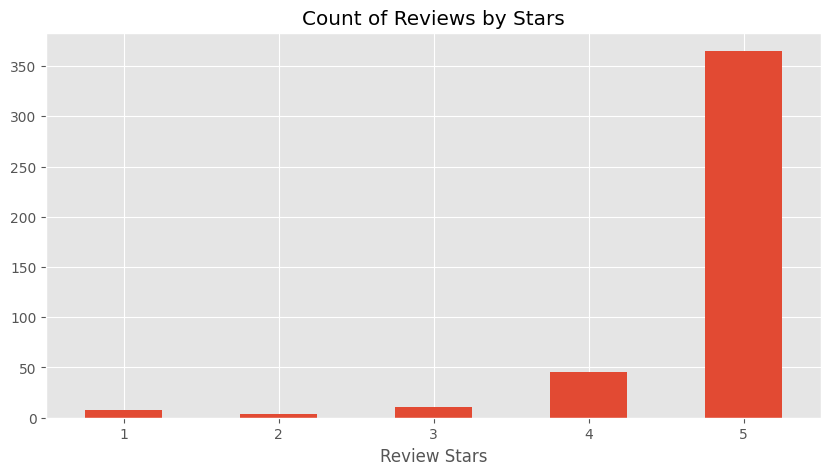

In [38]:
ax = df['ratings'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))

ax.set_xlabel('Review Stars')

# Adjust the rotation of x-axis tick labels
plt.xticks(rotation=0)

plt.show()

### wordclouds

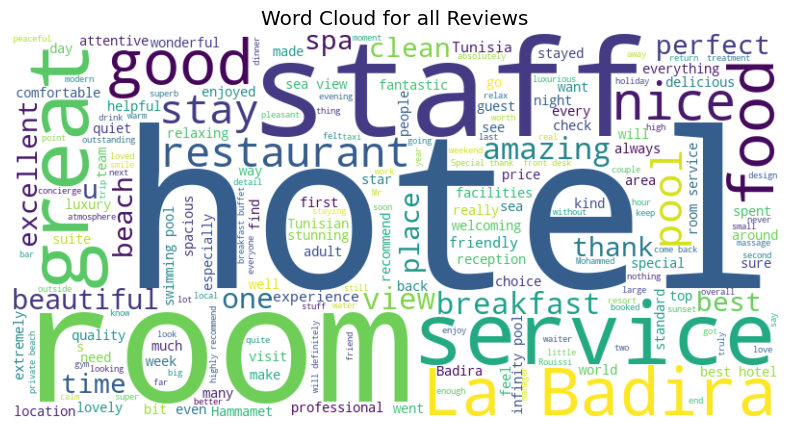

In [39]:
#Word Cloud for all Reviews
# Combine all reviews into a single string
all_reviews = ' '.join(df['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for all Reviews')
plt.show()

### Exploring the reviews

In [40]:
# Sort the reviews by positive sentiment (using roberta_pos) in descending order
positive_reviews = df_combined.sort_values("roberta_pos", ascending=False)[["reviews", "roberta_pos"]]

# Display the top 10 positive sentiment reviews
positive_reviews.head(10)

,reviews,roberta_pos
333,I had a wonderful time in La badira it is so b...,0.993470
358,I've spent an amazing week at La badira and I ...,0.993444
132,Kaies was amazing to us during out stay. We fe...,0.993202
9,It was incredible. The staff was incredible. F...,0.993179
104,Thank you so much for the hospitality and qual...,0.993137
81,We had a great stay at La Badira Hotel. Very g...,0.993122
284,It’s one of the he best and unique hotel i hav...,0.993104
133,Aymen was the best server of this entire resta...,0.993028
63,Absolutely stunning hotel ! The staff is what ...,0.993016
130,This is my second time at badira and it was a ...,0.992926


In [41]:
# Sort the reviews by negative sentiment (using roberta_neg) in descending order
negative_reviews = df_combined.sort_values("roberta_neg", ascending=False)[["reviews", "roberta_neg"]]

# Display the top 10 negative sentiment reviews
negative_reviews.head(10)

,reviews,roberta_neg
206,I cannot understand why this hotel is a member...,0.955767
178,It is such a shame that La Badira is a beautif...,0.947359
271,Not what I expected . The lobby is dead The p...,0.888235
21,I spent 5 days with my family at Hotel badira...,0.869224
243,"Large room, clean. Clean hotel and excellent b...",0.846707
188,The hotel is far from being luxurious. The roo...,0.762225
363,"Bad experience, went for honeymoon, no set-up,...",0.759061
200,A true disapointement for a so high expectatio...,0.716518
251,I see a lot of good reviews on the hotel but I...,0.701361
316,"Great hotel, great room, fairly good food. Ave...",0.680868


### Exploring the reviews aspects

In [42]:
# Define a list of words that indicate aspects of a review (both positive and negative)
review_aspects = ["staff", "service", "food", "location", "ambience", "cleanliness", "amenities"]

# Preprocess and tokenize the reviews
def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return [token for token in tokens if token.isalnum()]

# Calculate the frequency of words in the reviews
def get_word_frequency(reviews, words):
    word_counter = Counter()
    for review in reviews:
        tokens = preprocess(review)
        for token in tokens:
            if token in words:
                word_counter[token] += 1
    return word_counter

# Set the threshold for positive and negative sentiment
positive_threshold = 0.8
negative_threshold = 0.2

# Filter the reviews based on positive sentiment (using roberta_pos)
positive_reviews = df_combined[df_combined["roberta_pos"] >= positive_threshold]["reviews"]

# Calculate the frequency of words in these positive reviews
positive_word_frequency = get_word_frequency(positive_reviews, review_aspects)

# Display the most common positive words and their counts
print("Positive Words Frequency:")
print(positive_word_frequency.most_common())

# Filter the reviews based on negative sentiment (using roberta_neg)
negative_reviews = df_combined[df_combined["roberta_neg"] > negative_threshold]["reviews"]

# Calculate the frequency of words in these negative reviews
negative_word_frequency = get_word_frequency(negative_reviews, review_aspects)

# Display the most common negative words and their counts
print("Negative Words Frequency:")
print(negative_word_frequency.most_common())

Positive Words Frequency:
[('staff', 268), ('service', 221), ('food', 158), ('location', 41), ('amenities', 12), ('cleanliness', 5), ('ambience', 2)]
Negative Words Frequency:
[('service', 15), ('staff', 15), ('food', 14), ('location', 3), ('amenities', 2), ('cleanliness', 1)]


## Interpretation and conclusion

### Positive Aspects:

1. **Staff and Service:** The words 'staff' and 'service' are frequently mentioned in both positive and negative reviews. In positive reviews, guests often highlight the attentive and helpful staff, emphasizing the quality of service they received during their stay. This indicates that the hotel's staff members are a significant contributing factor to guests' positive experiences.

2. **Delicious Food:** The word 'food' appears frequently in positive reviews, suggesting that guests appreciate the quality and taste of the meals offered at the hotel's restaurant. This implies that the culinary offerings are a standout feature of the guest experience.

3. **Location and Amenities:** While 'location' and 'amenities' appear less frequently, they are still mentioned in positive reviews. Guests may appreciate the hotel's convenient location and the available amenities that contribute to their overall satisfaction.

4. **Cleanliness:** Although mentioned to a lesser extent, 'cleanliness' is still a positive aspect in reviews. This indicates that guests appreciate the efforts put into maintaining a clean and tidy environment.

### Negative Aspects:

1. **Service and Staff:** Interestingly, 'service' and 'staff' are also mentioned in negative reviews, albeit less frequently. This suggests that while the staff's performance is generally positive, there might be occasional instances where service falls short of expectations, leading to dissatisfaction among guests.

2. **Food:** The word 'food' is mentioned in negative reviews as well. This could indicate that there might be cases where guests found the dining experience to be disappointing or not up to their expectations.

3. **Location:** 'Location' is mentioned a few times in negative reviews. This suggests that some guests might have concerns or issues related to the hotel's location, which might impact their overall experience.

### Overall Conclusion:

"La Badira" in Tunisia appears to excel in aspects like attentive staff, quality service, and delicious food, which are frequently mentioned in both positive and negative reviews. However, there are occasional instances where service and food might not meet guests' expectations. It's also noteworthy that while the hotel's amenities and cleanliness contribute positively, there is room for improvemnities for enhancement.
